## Predicto api for Python - example usage
Sample usage to retrieve latest forecasts and trade picks programmatically (https://predic.to)

To use predicto api and reproduce this notebook, you'll need to have a valid Predicto account. 
If you don't have one, you can create one here: https://predic.to and get a free trial period.

To authenticate you'll need an api key. To retrieve it, login to https://predic.to and head to your [settings page](https://predic.to/account). Then paste it in the `predicto_api_key` variable below.

If you get any exception/error while running below code, please make sure your api key is correct and your subscription/trial is not expired.
Please note that there is a limit to the number of requests you can make per minute, depending on your account type.

### Import needed packages

In [1]:
import sys
sys.path.append("../predicto_api/")

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import IPython.display as display

from predicto_api_wrapper import PredictoApiWrapper, TradeAction

### Prepare and initialize our Predicto wrapper
You'll need to have a valid Predicto account as mentioned above, and get an api key. Then replace the `predicto_api_key` variable below

In [2]:
predicto_api_key = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
predicto_api_wrapper = PredictoApiWrapper(predicto_api_key)

### Let's start by retrieving all supported tickers
We generate forecasts and trade picks for a limited amount of stocks and cryptos for the time being

In [3]:
# Get all supported stocks
stocks_json = predicto_api_wrapper.get_supported_tickers()
stocks_df = pd.DataFrame(stocks_json)

# print some information
print('Total tickers supported: {0}'.format(len(stocks_df)))
print('Here is a sample:')
stocks_df.head(15)

Total tickers supported: 156
Here is a sample:


,RelatedStock,RelatedCompany
0,ZRX,0x
1,AMD,AMD
2,ANSS,ANSYS Inc.
3,ASML,ASML Holding
4,ATVI,Activision
5,ADBE,Adobe Inc.
6,ALXN,Alexion Pharmaceuticals
7,ALGO,Algorand
8,BABA,Alibaba
9,ALGN,Align Technology


### Let's inspect forecasts and trade picks that were generated yesterday (All forecasts are for 15 days ahead)

In [4]:
sdate = (datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d')
print(sdate)

2022-10-25


### Let's see what forecast we got for Bitcoin (BTC)
We predict a big up trend forecast, and recommended action is BUY with entry/target/stopLoss prices

Forecast for BTC on 2022-10-25


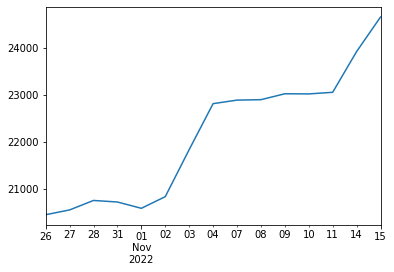

              Prediction   HighConfInt    LowConfInt
2022-10-26  20443.345561  20715.640321  20171.050802
2022-10-27  20545.706710  20908.842166  20184.923506
2022-10-28  20748.047723  21243.637874  20259.295097
2022-10-31  20714.700942  21366.114146  20077.371380
2022-11-01  20580.212578  21422.333470  19763.841928
2022-11-02  20829.442832  21962.870240  19743.840575
2022-11-03  21834.735965  23314.004728  20435.015881
2022-11-04  22815.711087  24624.839258  21122.232104
2022-11-07  22891.336447  24960.634031  20974.224619
2022-11-08  22900.530037  25183.190028  20804.059849
2022-11-09  23026.893505  25622.462874  20670.763192
2022-11-10  23023.633954  25986.080256  20371.565060
2022-11-11  23057.952858  26274.255282  20206.384206
2022-11-14  23927.465991  27737.246509  20605.222957
2022-11-15  24665.648400  29001.044538  20937.759671

Trade Pick generated based on forecast for BTC on 2022-10-25
---------------------------------------
Action          : 	Buy
Entry price     : 	20087.68

In [5]:
(forecast_json, trade_pick_json) = predicto_api_wrapper.get_forecast_and_tradepick_info('BTC', sdate, True)

### Let's see what forecast we got for Amazon (AMZN)
We predict an down trend forecast, and recommended action is SELL (short) with entry/target/stopLoss prices and expiration date.

Forecast for AMZN on 2022-10-25


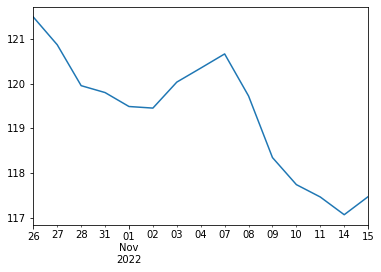

            Prediction  HighConfInt  LowConfInt
2022-10-26  121.485114   122.109169  120.861059
2022-10-27  120.865873   121.812565  119.922511
2022-10-28  119.952985   121.212715  118.701529
2022-10-31  119.798939   121.770276  117.850641
2022-11-01  119.487631   121.867717  117.143846
2022-11-02  119.452211   122.119356  116.832509
2022-11-03  120.032619   123.266138  116.870735
2022-11-04  120.345003   124.102021  116.686529
2022-11-07  120.661741   124.927895  116.524222
2022-11-08  119.722511   124.961027  114.679272
2022-11-09  118.347656   124.694233  112.290233
2022-11-10  117.743305   124.715017  111.124681
2022-11-11  117.466945   125.454911  109.943764
2022-11-14  117.071553   125.600453  109.076078
2022-11-15  117.474745   126.385074  109.145995

Trade Pick generated based on forecast for AMZN on 2022-10-25
---------------------------------------
Action          : 	Sell
Entry price     : 	120.6
Target price    : 	118.482931866
StopLoss price  : 	121.1292670335
Expiration Da

In [6]:
(forecast_json, trade_pick_json) = predicto_api_wrapper.get_forecast_and_tradepick_info('AMZN', sdate, True)

### We can also inspect recent performance graphs for a model
Let's inspect recent performance of Microsoft (MSFT) model - those GIF graphs are update weekly

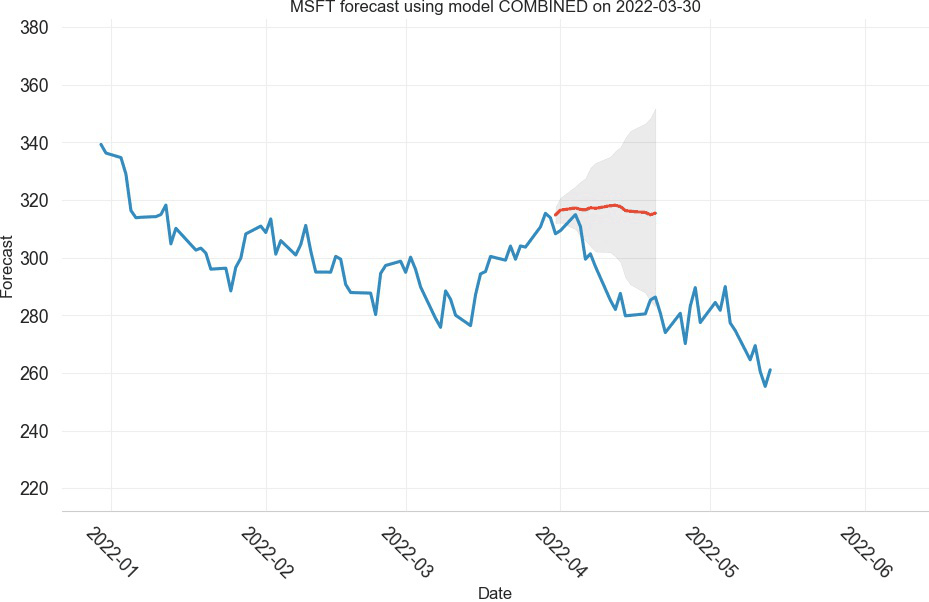

In [7]:
blob_url = predicto_api_wrapper.get_model_recent_performance_graph('MSFT')
display.Image(requests.get(blob_url).content)